<a href="https://colab.research.google.com/github/rickytjoe/Data-Visualization/blob/master/Ricky_Task6_DataMBA_Batch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [5]:
df = pd.read_csv('/content/drive/My Drive/Datasets/transactions1.csv', sep=";",low_memory=False)


# EDA

In [6]:
df.head()

,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,5533441,733493772,733493772,5000,5000.0,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,01/04/2020,03/08/2014,03/08/2014,492,492,9184,PURCHASE,True,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False
1,5533442,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,01/06/2023,03/08/2014,03/08/2014,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,5533443,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.4,Lyft,US,US,5.0,1.0,rideshare,01/12/2027,03/08/2014,03/08/2014,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,5533444,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,01/09/2029,03/08/2014,03/08/2014,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,5533445,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.0,Lyft,US,US,2.0,1.0,rideshare,01/10/2024,03/08/2014,03/08/2014,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   transaction_id            641914 non-null  int64  
 1   accountNumber             641914 non-null  int64  
 2   customerId                641914 non-null  int64  
 3   creditLimit               641914 non-null  int64  
 4   availableMoney            641914 non-null  object 
 5   transactionDateTime       641914 non-null  object 
 6   transactionAmount         641914 non-null  object 
 7   merchantName              641914 non-null  object 
 8   acqCountry                638001 non-null  object 
 9   merchantCountryCode       641290 non-null  object 
 10  posEntryMode              638569 non-null  float64
 11  posConditionCode          641627 non-null  float64
 12  merchantCategoryCode      641914 non-null  object 
 13  currentExpDate            641914 non-null  o

In [ ]:

df['availableMoney'] = pd.to_numeric(df['availableMoney'], errors= "coerce")
df['transactionAmount'] = pd.to_numeric(df['transactionAmount'], errors = "coerce")
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors = "coerce")
df['trantionDateTime'] = pd.to_datetime(df['transactionDateTime'],format="%Y-%m-%dT%H:%M:%S")
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'],format="%d/%m/%Y")
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'],format="%d/%m/%Y")
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'],format="%d/%m/%Y")


In [ ]:
df.describe()

,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,6.419140e+05,6.419140e+05,6.419140e+05,641914.000000,641635.000000,640098.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,0.0,641794.000000,0.0,0.0,0.0,0.0,0.0
mean,5.854398e+06,5.547701e+08,5.547701e+08,10697.210608,6655.491815,135.535991,9.136460,3.238367,557.199927,556.775160,4886.184043,NaN,4045.137565,NaN,NaN,NaN,NaN,NaN
std,1.853048e+05,2.546884e+08,2.546884e+08,11460.359133,9228.210381,147.094204,16.961185,9.680862,257.326204,257.402639,2859.053679,NaN,5945.809259,NaN,NaN,NaN,NaN,NaN
min,5.533441e+06,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.693919e+06,3.223192e+08,3.223192e+08,5000.000000,1117.010000,32.700000,2.000000,1.000000,334.000000,333.000000,2364.000000,NaN,503.190000,NaN,NaN,NaN,NaN,NaN
50%,5.854398e+06,5.438879e+08,5.438879e+08,7500.000000,3580.870000,86.230000,5.000000,1.000000,581.000000,580.000000,4873.000000,NaN,2152.635000,NaN,NaN,NaN,NaN,NaN
75%,6.014876e+06,7.862277e+08,7.862277e+08,15000.000000,8174.865000,189.457500,9.000000,1.000000,762.000000,761.000000,7267.000000,NaN,5006.760000,NaN,NaN,NaN,NaN,NaN
max,6.175354e+06,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,NaN,47496.500000,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,recurringAuthInd,641914,0.000000
1,posOnPremises,641914,0.000000
2,merchantZip,641914,0.000000
3,merchantState,641914,0.000000
4,merchantCity,641914,0.000000
5,echoBuffer,641914,0.000000
6,acqCountry,3913,99.390417
7,posEntryMode,3345,99.478902
8,transaction_id,0,100.000000
9,transactionHour,0,100.000000


# Deleting columns that has more than 50% Nan Values

In [ ]:
null_cols = df.loc[:,df.isna().sum()*100/df.shape[0]>0.5].columns
df.drop(null_cols,axis=1,inplace=True)

In [ ]:
df.shape

(641914, 31)

In [ ]:
df.head()

,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,trantionDateTime
0,5533441,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,2016-01-08 19:04:50
1,5533442,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False,2016-01-09 22:32:39
2,5533443,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False,2016-01-11 13:36:55
3,5533444,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False,2016-01-11 22:47:46
4,5533445,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False,2016-01-16 01:41:11


In [ ]:
df.isnull().sum()

transaction_id                   0
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode              0
posEntryMode                  3345
posConditionCode                 0
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                  0
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

# IMPUTATION

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


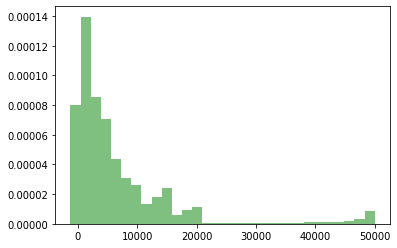

In [ ]:
plt.hist(df['availableMoney'], bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='none');

In [ ]:
df['availableMoney'].fillna(df['availableMoney'].median(), inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


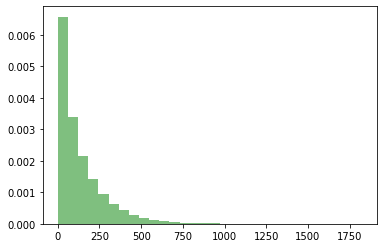

In [ ]:
plt.hist(df['transactionAmount'], bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='none');

In [ ]:
df['transactionAmount'].fillna(df['transactionAmount'].median(), inplace=True)

In [ ]:
df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0], inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


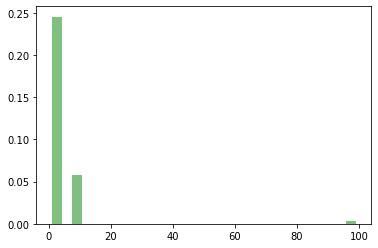

In [ ]:
plt.hist(df['posConditionCode'], bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='none');

In [ ]:
df['posConditionCode'].fillna(df['posConditionCode'].mode()[0], inplace=True)

In [ ]:
df['transactionType'].fillna(df['transactionType'].mode()[0], inplace=True)

In [ ]:
df['currentBalance'].fillna(df['currentBalance'].median(), inplace=True)

In [ ]:
df.isnull().sum()

transaction_id                   0
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode              0
posEntryMode                  3345
posConditionCode                 0
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                  0
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

## Univariate Analysis 1 : Monthly Fraud Frequency

In [ ]:
df_total = df.groupby(['transactionMonth','isFraud'])['transaction_id'].count().reset_index()

In [ ]:
df_fraud = df_total[(df_total['isFraud']==True)].sort_values(by = 'transaction_id',ascending = False).reset_index()

In [ ]:
df_fraud.head()

,index,transactionMonth,isFraud,transaction_id
0,5,3,True,1017
1,1,1,True,993
2,19,10,True,993
3,13,7,True,988
4,9,5,True,984


In [ ]:
df_fraud.columns = ['index','transactionMonth','isFraud','count_trx']

In [ ]:
df_fraud.columns=['index', 'transactionMonth','isfraud','count_trx']

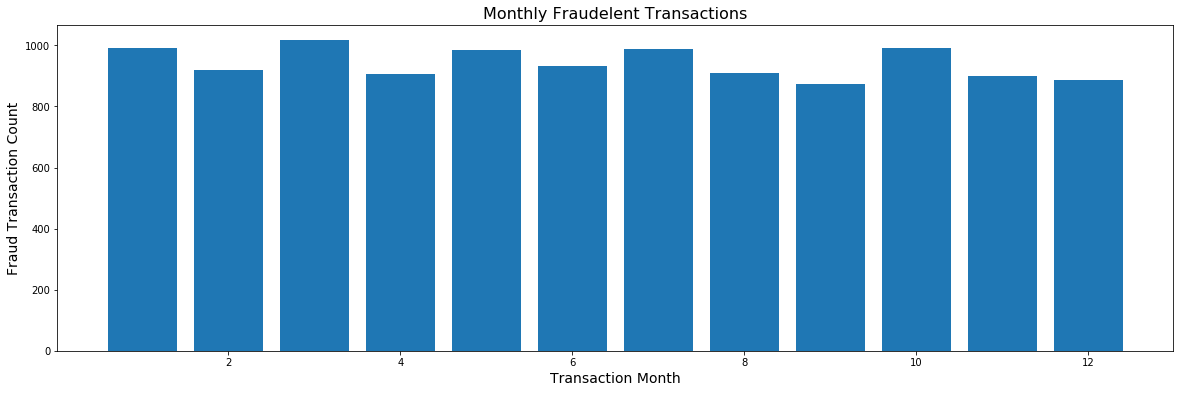

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(x='transactionMonth', height='count_trx', data=df_fraud)
plt.title('Monthly Fraudelent Transactions', fontsize = 16) 
plt.ylabel('Fraud Transaction Count', fontsize=14) 
plt.xlabel('Transaction Month', fontsize=14);

## Univariate Analysis 2 = Percentage of Fraud

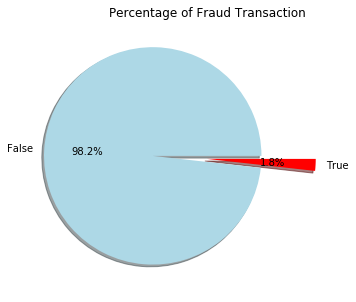

In [ ]:
plt.figure(figsize=(10,5))
labels = df['isFraud'].value_counts(sort = True).index
sizes =  df['isFraud'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.5,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title('Percentage of Fraud Transaction')
plt.show()

# Bivariate Analysis 1 = Current Balance and Fraudelent Transactions

In [ ]:
df_totalfraud =df[(df['isFraud']==True)]

In [ ]:
df_totalfraud

,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,transactionHour,transactionYear,transactionMonth
0,5533441,733493772,733493772,5000,5000.00,111.33,Lyft,US,US,5.0,1.0,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,19,2016,1
3,5533444,733493772,733493772,5000,4676.52,227.34,Lyft,US,US,2.0,1.0,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False,22,2016,1
73,5533514,733493772,733493772,5000,2730.06,78.92,Lyft,US,US,5.0,1.0,rideshare,2027-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,2269.94,NaN,NaN,NaN,False,NaN,NaN,False,22,2016,6
80,5533521,733493772,733493772,5000,2394.36,665.84,Lyft,US,US,2.0,1.0,rideshare,2031-08-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,2605.64,NaN,NaN,NaN,False,NaN,NaN,False,6,2016,6
85,5533526,733493772,733493772,5000,910.91,665.84,Lyft,US,US,2.0,1.0,rideshare,2031-08-01,2014-08-03,2014-08-03,492,492,9184,REVERSAL,True,NaN,4089.09,NaN,NaN,NaN,False,NaN,NaN,False,6,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641627,6175068,877651598,877651598,7500,5802.15,44.27,target.com,US,US,5.0,1.0,online_retail,2019-02-01,2012-01-07,2012-01-07,547,547,3593,PURCHASE,True,NaN,1697.85,NaN,NaN,NaN,False,NaN,NaN,False,9,2016,11
641792,6175233,455115932,455115932,50000,34545.80,12.71,Blue Mountain Online Services,US,US,5.0,1.0,online_gifts,2023-04-01,2011-02-02,2011-02-02,148,148,2521,PURCHASE,True,NaN,15454.20,NaN,NaN,NaN,False,NaN,NaN,False,0,2016,9
641812,6175253,455115932,455115932,50000,33255.25,695.87,Fresh Flowers,US,US,9.0,1.0,online_gifts,2024-08-01,2011-02-02,2011-02-02,148,148,2521,PURCHASE,True,NaN,16744.75,NaN,NaN,NaN,False,NaN,NaN,False,4,2016,10
641870,6175311,186770399,186770399,7500,6448.10,92.60,Blue Mountain Online Services,US,US,2.0,1.0,online_gifts,2026-06-01,2015-11-04,2015-11-04,127,127,5432,PURCHASE,True,NaN,1051.90,NaN,NaN,NaN,False,NaN,NaN,False,8,2016,5


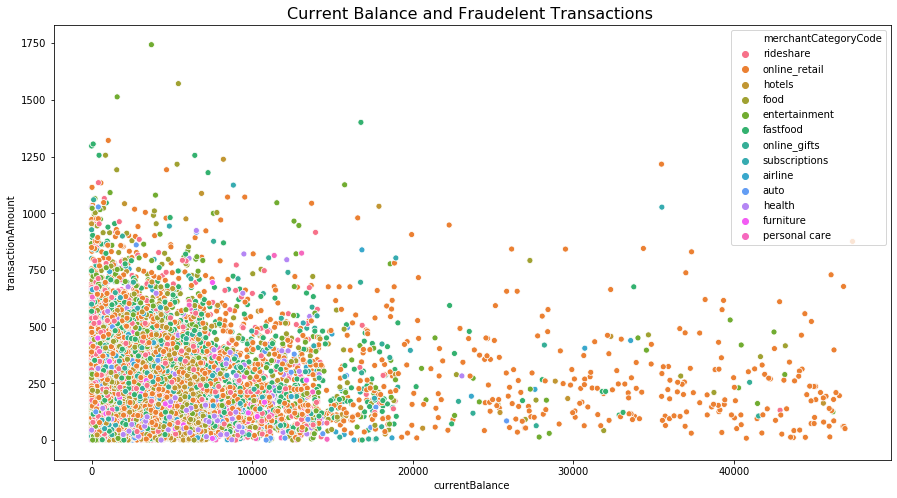

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='currentBalance', y='transactionAmount', hue='merchantCategoryCode',data=df_totalfraud)
plt.title('Current Balance and Fraudelent Transactions ', fontsize = 16);

# Bivariate Analysis 2 = Fraudelent Transactions by Merchant Categories

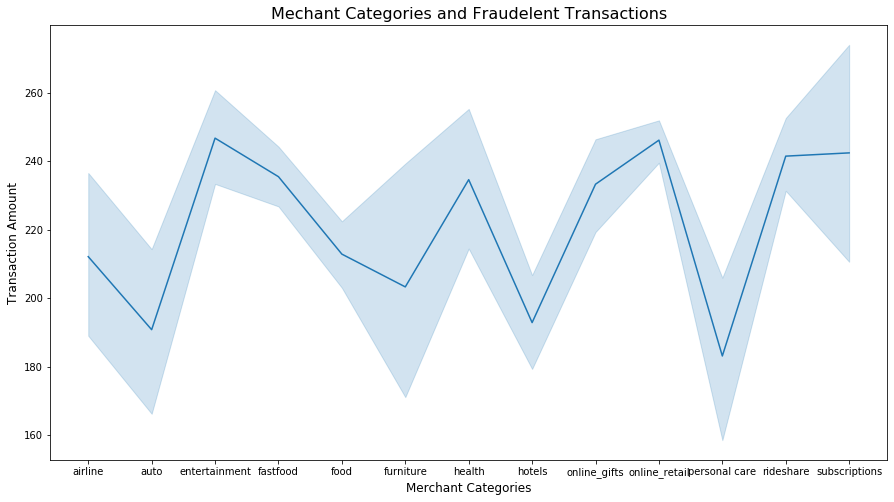

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='merchantCategoryCode', y='transactionAmount',data=df_totalfraud)
plt.title('Mechant Categories and Fraudelent Transactions', fontsize = 16)
plt.xlabel('Merchant Categories', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.show()